In [1]:
#importing  the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
#loading the combined data
df=pd.read_excel("/content/Clustering_data .xlsx")
df.head()

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label
0,karF1,0.458,0.408,0.263,0.151,0.105,0.111,0.030,0.164,0.224,0.312,0.313,0.336,1
1,komool1,0.158,0.100,0.091,0.132,0.370,0.518,0.501,0.534,0.456,0.274,0.219,0.219,0
2,karF2,0.558,0.488,0.293,0.139,0.170,0.172,0.027,0.169,0.267,0.383,0.391,0.450,1
3,sabania37,0.204,0.158,0.099,0.105,0.314,0.472,0.532,0.591,0.559,0.378,0.294,0.300,0
4,karF3,0.570,0.439,0.269,0.112,0.153,0.190,0.032,0.171,0.222,0.342,0.393,0.463,1


In [3]:
#loading the maize data
maize_f=pd.read_excel("/content/Maize_farms.xlsx")
maize_f.head()

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label
0,sabania72,0.171,0.138,0.106,0.126,0.282,0.410,0.470,0.572,0.610,0.448,0.297,0.262,0
1,sabania73,0.182,0.143,0.109,0.139,0.337,0.465,0.560,0.692,0.630,0.406,0.273,0.264,0
2,sabania74,0.165,0.149,0.103,0.111,0.279,0.279,0.399,0.401,0.487,0.584,0.434,0.281,0
3,sabania75,0.167,0.147,0.098,0.099,0.262,0.460,0.533,0.595,0.624,0.377,0.210,0.194,0
4,sabania76,0.167,0.147,0.098,0.099,0.262,0.460,0.533,0.595,0.624,0.377,0.210,0.194,0


In [4]:
#loading the coffee data
coffee_f=pd.read_excel("/content/coffee_farms.xlsx")
coffee_f.head(15
)

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label
0,GF5,0.531,0.450,0.347,0.256,0.255,0.149,0.053,0.216,0.316,0.339,0.384,0.469,1
1,GF6,0.599,0.521,0.393,0.329,0.301,0.137,0.054,0.210,0.305,0.349,0.434,0.558,1
2,GF7,0.529,0.453,0.351,0.272,0.258,0.142,0.048,0.203,0.310,0.342,0.345,0.446,1
3,GF8,0.516,0.439,0.348,0.300,0.280,0.132,0.044,0.183,0.270,0.299,0.370,0.482,1
4,GF9,0.485,0.429,0.336,0.273,0.254,0.120,0.038,0.169,0.245,0.251,0.339,0.481,1
5,GF10,0.654,0.588,0.463,0.362,0.339,0.165,0.060,0.236,0.308,0.292,0.414,0.622,1
6,viewF21,0.705,0.536,0.408,0.333,0.395,0.241,0.045,0.239,0.404,0.388,0.425,0.409,1
7,viewF22,0.618,0.503,0.417,0.360,0.388,0.223,0.041,0.176,0.310,0.353,0.417,0.421,1
8,GF1,0.596,0.526,0.403,0.334,0.318,0.148,0.055,0.219,0.316,0.355,0.454,0.567,1
9,GF2,0.565,0.482,0.375,0.319,0.297,0.139,0.058,0.206,0.272,0.310,0.433,0.542,1


# **coffee farms**

In [ ]:
#getting the shape of the data
coffee_f.shape

(99, 14)

In [ ]:
#removing the label and the shapefile column
coffee = coffee_f.iloc[:, 1:-1]
coffee.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.531,0.450,0.347,0.256,0.255,0.149,0.053,0.216,0.316,0.339,0.384,0.469
1,0.599,0.521,0.393,0.329,0.301,0.137,0.054,0.210,0.305,0.349,0.434,0.558
2,0.529,0.453,0.351,0.272,0.258,0.142,0.048,0.203,0.310,0.342,0.345,0.446
3,0.516,0.439,0.348,0.300,0.280,0.132,0.044,0.183,0.270,0.299,0.370,0.482
4,0.485,0.429,0.336,0.273,0.254,0.120,0.038,0.169,0.245,0.251,0.339,0.481


# **visualizing the coffee data**

In [ ]:
subsets_coffee = coffee.iloc[0:10]
subsets_coffee

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.531,0.450,0.347,0.256,0.255,0.149,0.053,0.216,0.316,0.339,0.384,0.469
1,0.599,0.521,0.393,0.329,0.301,0.137,0.054,0.210,0.305,0.349,0.434,0.558
2,0.529,0.453,0.351,0.272,0.258,0.142,0.048,0.203,0.310,0.342,0.345,0.446
3,0.516,0.439,0.348,0.300,0.280,0.132,0.044,0.183,0.270,0.299,0.370,0.482
4,0.485,0.429,0.336,0.273,0.254,0.120,0.038,0.169,0.245,0.251,0.339,0.481
5,0.654,0.588,0.463,0.362,0.339,0.165,0.060,0.236,0.308,0.292,0.414,0.622
6,0.705,0.536,0.408,0.333,0.395,0.241,0.045,0.239,0.404,0.388,0.425,0.409
7,0.618,0.503,0.417,0.360,0.388,0.223,0.041,0.176,0.310,0.353,0.417,0.421
8,0.596,0.526,0.403,0.334,0.318,0.148,0.055,0.219,0.316,0.355,0.454,0.567
9,0.565,0.482,0.375,0.319,0.297,0.139,0.058,0.206,0.272,0.310,0.433,0.542


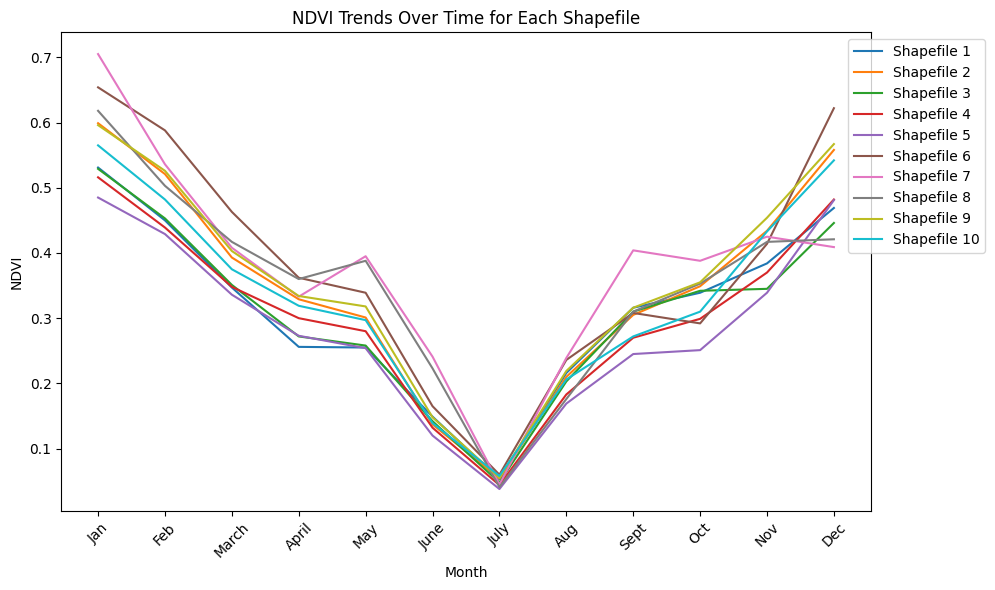

In [ ]:
#getting the Ndvi trend for the coffee data using subsetof 10 datapoints

months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
for i in range(subsets_coffee.shape[0]):
    plt.plot(months, subsets_coffee.iloc[i], label=f'Shapefile {i+1}')


plt.xlabel('Month')
plt.ylabel('NDVI')
plt.title('NDVI Trends Over Time for Each Shapefile')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [ ]:
subset_coffee = coffee.iloc[0:90]
subset_coffee

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.531,0.450,0.347,0.256,0.255,0.149,0.053,0.216,0.316,0.339,0.384,0.469
1,0.599,0.521,0.393,0.329,0.301,0.137,0.054,0.210,0.305,0.349,0.434,0.558
2,0.529,0.453,0.351,0.272,0.258,0.142,0.048,0.203,0.310,0.342,0.345,0.446
3,0.516,0.439,0.348,0.300,0.280,0.132,0.044,0.183,0.270,0.299,0.370,0.482
4,0.485,0.429,0.336,0.273,0.254,0.120,0.038,0.169,0.245,0.251,0.339,0.481
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.512,0.436,0.287,0.178,0.313,0.219,0.022,0.102,0.181,0.234,0.285,0.364
86,0.506,0.433,0.276,0.177,0.290,0.198,0.039,0.110,0.171,0.203,0.270,0.351
87,0.469,0.392,0.278,0.179,0.304,0.207,0.042,0.124,0.201,0.293,0.281,0.357
88,0.432,0.356,0.220,0.147,0.258,0.183,0.025,0.107,0.201,0.245,0.288,0.282


In [ ]:
subset_coffee.shape

(90, 12)

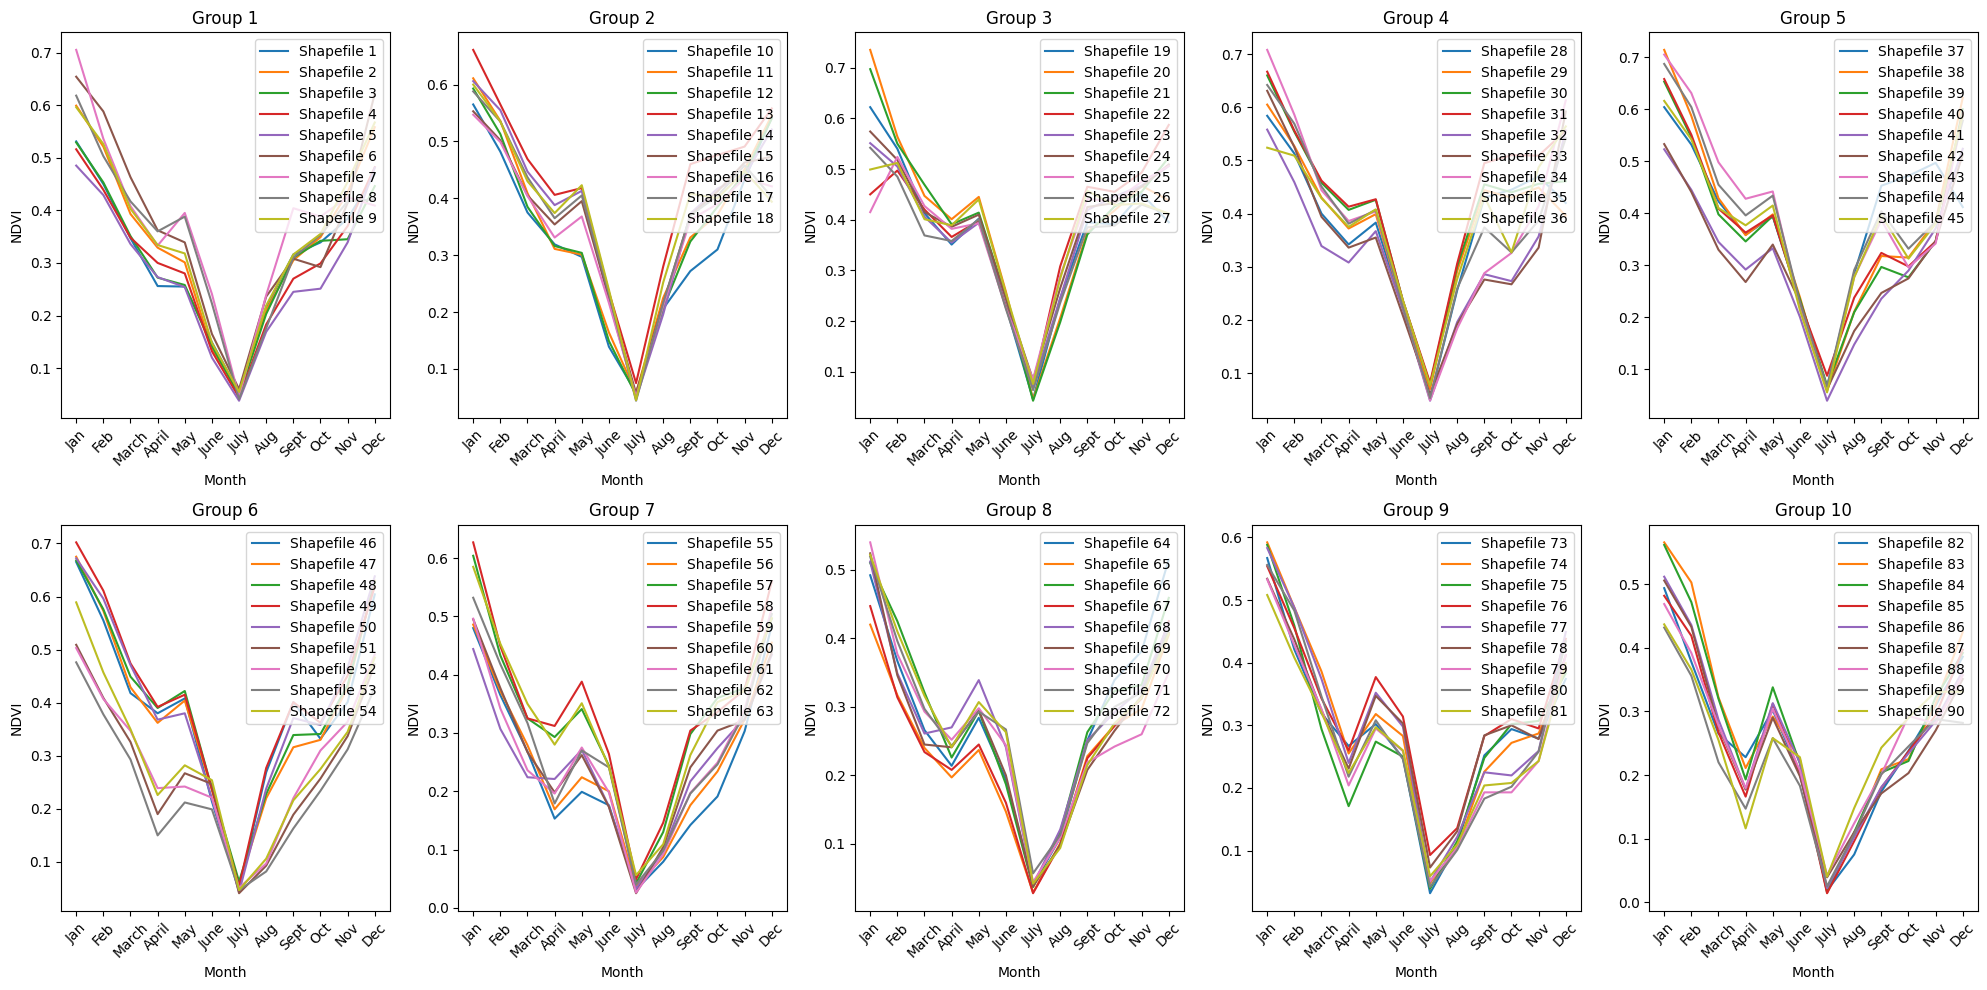

In [ ]:
#Creating a subplot of the entire  coffee data
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.ravel()

shapefiles_per_subplot = 9


total_shapefiles = 90
for i in range(10):
    start_idx = i * shapefiles_per_subplot
    end_idx = min(start_idx + shapefiles_per_subplot, total_shapefiles)
    for j in range(start_idx, end_idx):
        axs[i].plot(months, subset_coffee.iloc[j], label=f'Shapefile {j+1}')

    axs[i].set_title(f'Group {i+1}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('NDVI')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(loc='upper right')

#prevent overlap using layout function
plt.tight_layout()
plt.show()


# **Visualizing the maize data**

In [ ]:
#maize  dataset
maize = maize_f.iloc[:, 1:-1]
maize.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.171,0.138,0.106,0.126,0.282,0.410,0.470,0.572,0.610,0.448,0.297,0.262
1,0.182,0.143,0.109,0.139,0.337,0.465,0.560,0.692,0.630,0.406,0.273,0.264
2,0.165,0.149,0.103,0.111,0.279,0.279,0.399,0.401,0.487,0.584,0.434,0.281
3,0.167,0.147,0.098,0.099,0.262,0.460,0.533,0.595,0.624,0.377,0.210,0.194
4,0.167,0.147,0.098,0.099,0.262,0.460,0.533,0.595,0.624,0.377,0.210,0.194


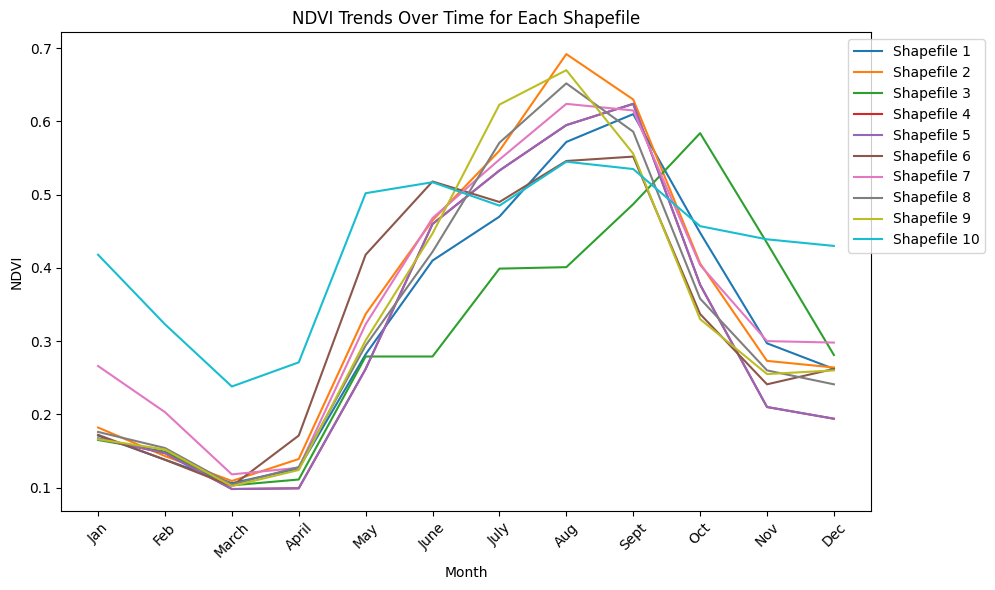

In [ ]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
for i in range(subsets_maize.shape[0]):
    plt.plot(months, maize.iloc[i], label=f'Shapefile {i+1}')


plt.xlabel('Month')
plt.ylabel('NDVI')
plt.title('NDVI Trends Over Time for Each Shapefile')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [ ]:

subsets_maize = maize.iloc[0:90]
subsets_maize.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.171,0.138,0.106,0.126,0.282,0.410,0.470,0.572,0.610,0.448,0.297,0.262
1,0.182,0.143,0.109,0.139,0.337,0.465,0.560,0.692,0.630,0.406,0.273,0.264
2,0.165,0.149,0.103,0.111,0.279,0.279,0.399,0.401,0.487,0.584,0.434,0.281
3,0.167,0.147,0.098,0.099,0.262,0.460,0.533,0.595,0.624,0.377,0.210,0.194
4,0.167,0.147,0.098,0.099,0.262,0.460,0.533,0.595,0.624,0.377,0.210,0.194


In [ ]:
subsets_maize.shape

(90, 12)

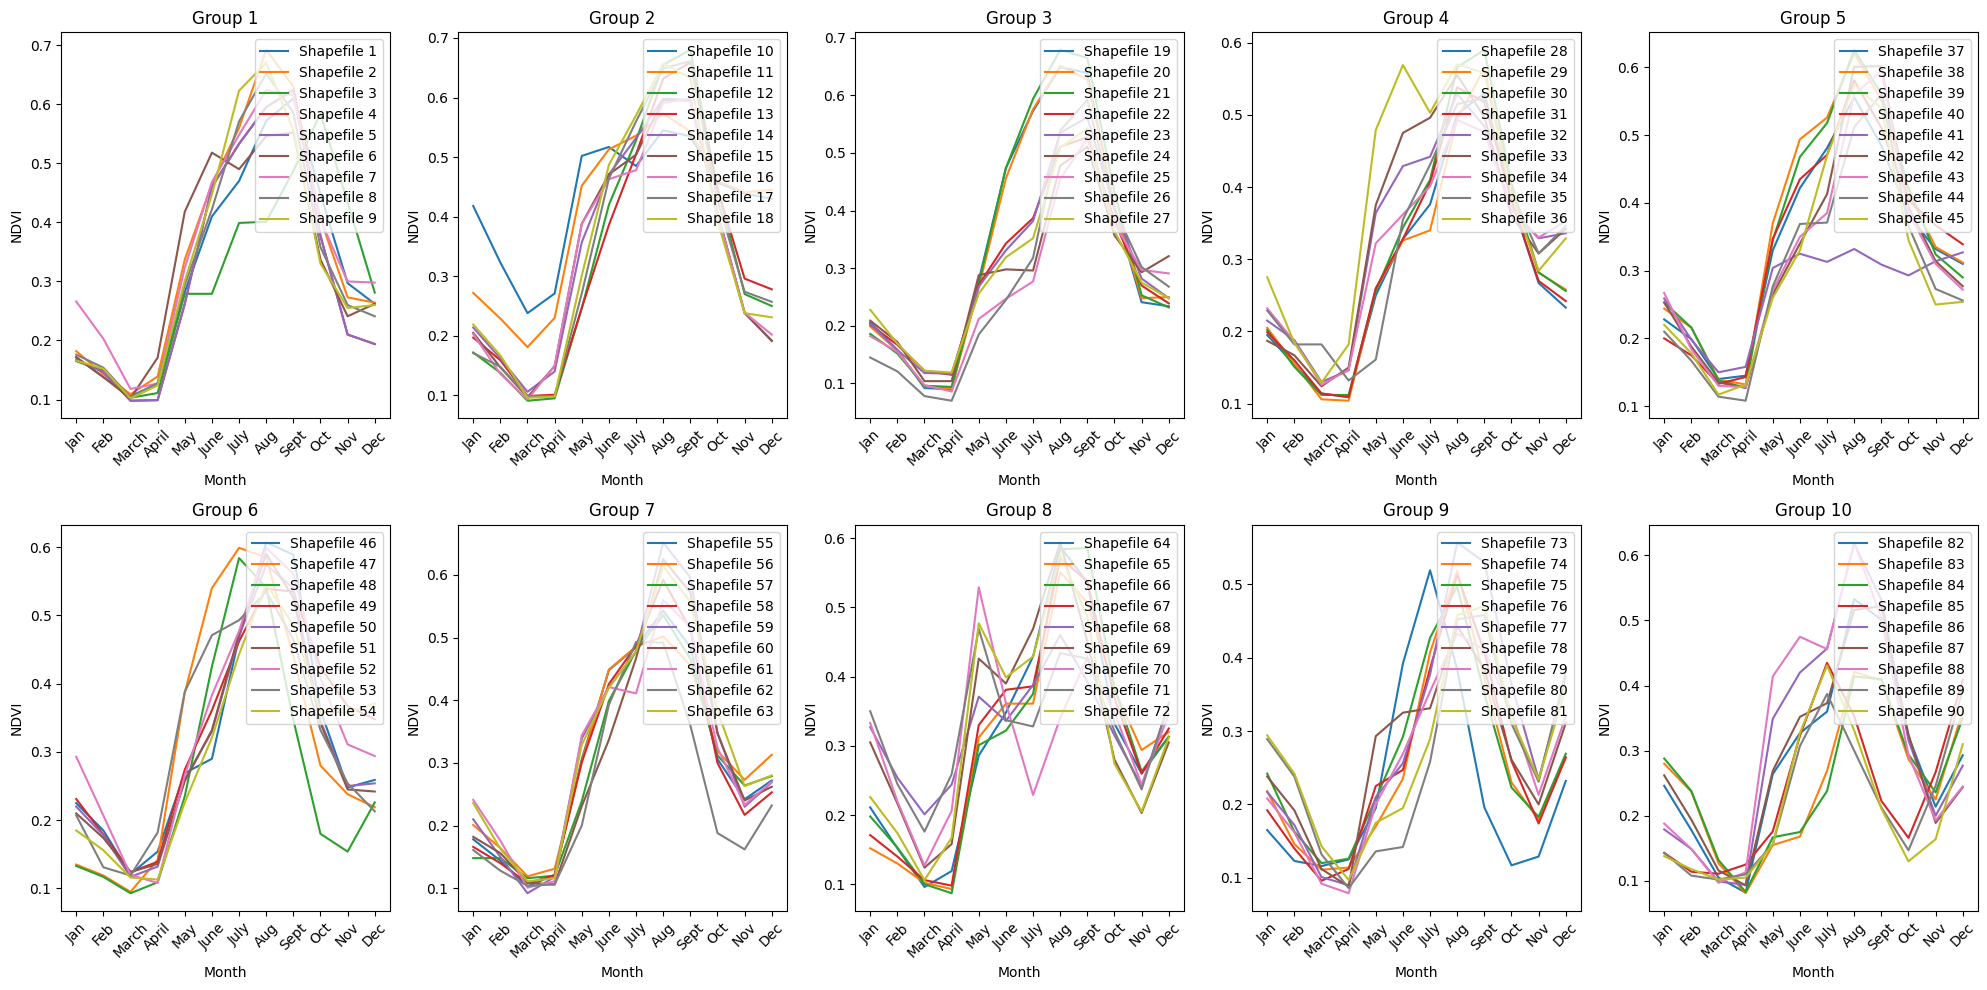

In [ ]:
#Creating a subplot of the entire  coffee data
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.ravel()

shapefiles_per_subplot = 9


total_shapefiles = 90
for i in range(10):
    start_idx = i * shapefiles_per_subplot
    end_idx = min(start_idx + shapefiles_per_subplot, total_shapefiles)
    for j in range(start_idx, end_idx):
        axs[i].plot(months, subsets_maize.iloc[j], label=f'Shapefile {j+1}')

    axs[i].set_title(f'Group {i+1}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('NDVI')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(loc='upper right')

#prevent overlap using layout function
plt.tight_layout()
plt.show()


#**DBSCAN CLUSTERING**

In [ ]:
#combined dataset for maize and coffee
data = df.iloc[:, 1:-1]
data.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.458,0.408,0.263,0.151,0.105,0.111,0.030,0.164,0.224,0.312,0.313,0.336
1,0.158,0.100,0.091,0.132,0.370,0.518,0.501,0.534,0.456,0.274,0.219,0.219
2,0.558,0.488,0.293,0.139,0.170,0.172,0.027,0.169,0.267,0.383,0.391,0.450
3,0.204,0.158,0.099,0.105,0.314,0.472,0.532,0.591,0.559,0.378,0.294,0.300
4,0.570,0.439,0.269,0.112,0.153,0.190,0.032,0.171,0.222,0.342,0.393,0.463


In [ ]:
#applying the DBSCAN algorithm
dbscan_cluster=DBSCAN(eps=0.2,min_samples=15).fit(data)
dbscan_cluster

DBSCAN(eps=0.2, min_samples=15)

In [ ]:
dbscan_cluster.labels_

array([-1,  0,  1,  0, -1, -1,  1,  0,  1, -1, -1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1, -1,  1,  1,  1,  0,  0,  1,  1, -1, -1,  1,  1,  0,
        0,  1,  1,  0,  1, -1, -1,  1,  0, -1,  1, -1, -1,  1,  0,  0,  1,
        0,  0,  1, -1, -1,  1,  0, -1,  1, -1, -1,  1, -1,  0,  1,  0,  1,
        1,  0,  0,  1,  0,  0,  1,  1,  0, -1,  1,  1,  0,  0,  1,  0,  1,
        0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0, -1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1])

In [ ]:
data['clusters']=dbscan_cluster.labels_
data

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,clusters
0,0.458,0.408,0.263,0.151,0.105,0.111,0.030,0.164,0.224,0.312,0.313,0.336,-1
1,0.158,0.100,0.091,0.132,0.370,0.518,0.501,0.534,0.456,0.274,0.219,0.219,0
2,0.558,0.488,0.293,0.139,0.170,0.172,0.027,0.169,0.267,0.383,0.391,0.450,1
3,0.204,0.158,0.099,0.105,0.314,0.472,0.532,0.591,0.559,0.378,0.294,0.300,0
4,0.570,0.439,0.269,0.112,0.153,0.190,0.032,0.171,0.222,0.342,0.393,0.463,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.266,0.203,0.118,0.127,0.323,0.468,0.548,0.624,0.615,0.404,0.300,0.298,0
198,0.176,0.154,0.104,0.128,0.294,0.422,0.571,0.652,0.586,0.358,0.260,0.241,0
199,0.166,0.152,0.102,0.124,0.301,0.447,0.623,0.670,0.556,0.330,0.255,0.260,0
200,0.418,0.323,0.238,0.271,0.502,0.517,0.485,0.545,0.535,0.457,0.439,0.430,-1


In [ ]:
data['clusters'].value_counts()

,count
clusters,
1,96
0,81
-1,25


In [ ]:
#getting the percentage of the  noise/outliers in  data
n_noise = np.sum(dbscan_cluster.labels_ == -1)
total_points = len(dbscan_cluster.labels_)
noise_percentage = (n_noise / total_points) * 100

print(f'Number of Noise Points: {n_noise} ({noise_percentage:.2f}% of total points)')


Number of Noise Points: 25 (12.38% of total points)
